In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ast import literal_eval
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report, recall_score, f1_score, precision_recall_fscore_support

In [2]:
from google.colab import drive
from os import listdir,chdir
drive.mount('/content/drive/')
chdir('/content/drive/MyDrive/Proyecto Integrador/Version 3')

Mounted at /content/drive/


In [3]:
%time datos = pd.read_csv('data_equilibrada.csv')
%time datos.tokens=datos.tokens.apply(literal_eval)

CPU times: user 118 ms, sys: 32.9 ms, total: 151 ms
Wall time: 1 s
CPU times: user 2.38 s, sys: 60.4 ms, total: 2.44 s
Wall time: 2.47 s


In [4]:
datos.shape

(10532, 3)

In [5]:
outliers = pd.read_csv('outliers_medianas_2.csv').outliers
datos.drop(index=outliers.values,inplace=True)

In [6]:
bow = pd.read_csv('bow.csv')

In [7]:
%time tfidf=pd.DataFrame(TfidfVectorizer(vocabulary=bow.token.values).fit_transform(datos['tokens'].str.join(" ")).toarray(), columns=bow.token.values)

CPU times: user 790 ms, sys: 28.6 ms, total: 819 ms
Wall time: 838 ms


In [8]:
tfidf

,info,make,requir,inc,date,immedi,account,voltag,compani,fax,confirm,dunde,process,recipi,arbor,zgi,holcim,addit,home,support,provid,delet,encrypt,chang,sourc,industri,work,offic,want,ssn,imag,mylif,get,research,qti,know,view,form,resolut,hello,...,even,rout,audit,wednesday,confer,remind,act,swr,section,mortgag,beam,differ,atlant,qualiti,point,happen,invit,handl,import,recent,found,vega,histori,chicago,financi,fiori,leav,vylnbsyxrmb,seminar,depend,wed,none,test,thursday,step,inquiri,reserv,appli,futur,mqvoxdsxwki
0,0.223482,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.220847,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.0,0.239421,0.229699,0.0,0.0,0.251389,0.229033,0.0,0.000000,0.0,0.0,0.228208,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.077426,0.078593,0.0,0.000000,0.080448,0.000000,0.0,0.0,0.180256,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.080146,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.08209,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.146607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.125446,0.0,0.0,0.0,0.0,0.000000,0.372321,0.0,0.000000,0.000000,0.132149,0.0,0.0,0.000000,0.0,0.0,0.0,0.123967,0.0,0.0,0.000000,0.000000,0.0,0.13851,0.0,0.000000,0.0,0.0,0.000000,0.128936,0.0,0.0,0.000000,0.000000,0.0,0.137321,0.0,0.0,0.128099,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9584,0.415453,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.218826,0.0,0.0,0.000000,0.0,0.0,0.0,0.205277,0.0,0.0,0.218381,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.0,0.222541,0.213505,0.0,0.0,0.000000,0.212886,0.0,0.000000,0.0,0.0,0.212119,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9585,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9586,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    tfidf.values, datos.etiquetas.values, test_size=0.2, random_state=42)

In [10]:
cms_train=[]
cms_test=[]
accuracy_train = []
accuracy_test = []
f1_train = []
f1_test = []
recall_train = []
recall_test = []
reporte_train = []
reporte_test = []
Cs=np.arange(0.1,1.1,0.1)
for C in Cs:
    print("C:",C)
    svm = LinearSVC(C=C)
    svm.fit(X_train, y_train)

    predicciones_train=svm.predict(X_train)
    predicciones_test=svm.predict(X_test)

    cms_train.append(confusion_matrix(y_train,predicciones_train))
    cms_test.append(confusion_matrix(y_test,predicciones_test))
    accuracy_train.append(accuracy_score(y_train,predicciones_train))
    accuracy_test.append(accuracy_score(y_test,predicciones_test))
    f1_train.append(f1_score(y_train,predicciones_train,average='weighted'))
    f1_test.append(f1_score(y_test,predicciones_test,average='weighted'))
    recall_train.append(recall_score(y_train,predicciones_train,average='weighted'))
    recall_test.append(recall_score(y_test,predicciones_test,average='weighted'))
    reporte_train.append(precision_recall_fscore_support(y_train,predicciones_train))
    reporte_test.append(precision_recall_fscore_support(y_test,predicciones_test))

    print("Train:")
    print(cms_train[-1])
    print(classification_report(y_train,predicciones_train))

    print("Test:")
    print(cms_test[-1])
    print(classification_report(y_test,predicciones_test))
    print("-----------")

C: 0.1
Train:
[[1913   11   28  155  117]
 [  35 1145  150    9    2]
 [ 210   90 1196   44   62]
 [ 196    3   33 1033  107]
 [ 158    2    9  184  779]]
              precision    recall  f1-score   support

           0       0.76      0.86      0.81      2224
           1       0.92      0.85      0.88      1341
           2       0.84      0.75      0.79      1602
           3       0.72      0.75      0.74      1372
           4       0.73      0.69      0.71      1132

    accuracy                           0.79      7671
   macro avg       0.80      0.78      0.79      7671
weighted avg       0.79      0.79      0.79      7671

Test:
[[458   5  13  42  37]
 [ 12 304  31   4   1]
 [ 62  28 276  16  21]
 [ 51   0  12 238  35]
 [ 47   0   2  56 167]]
              precision    recall  f1-score   support

           0       0.73      0.83      0.77       555
           1       0.90      0.86      0.88       352
           2       0.83      0.68      0.75       403
           3     

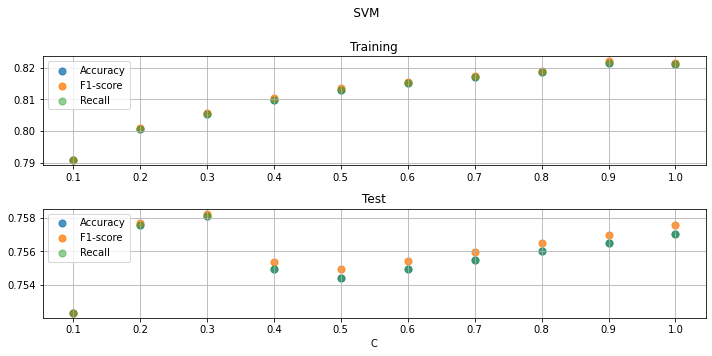

In [11]:
fig,ax=plt.subplots(2,1,figsize=(10,5),tight_layout=True)
fig.suptitle("     SVM")

ax[0].scatter(Cs,accuracy_train,s=50,alpha=0.8, label = 'Accuracy')
ax[0].scatter(Cs,f1_train,s=50,alpha=0.8, label = 'F1-score')
ax[0].scatter(Cs,recall_train,s=50,alpha=0.5, label = 'Recall')
ax[0].legend()
ax[0].grid()
ax[0].set_title('\n\nTraining')
ax[0].set_xticks(Cs)

ax[1].scatter(Cs,accuracy_test,s=50,alpha=0.8, label = 'Accuracy')
ax[1].scatter(Cs,f1_test,s=50,alpha=0.8, label = 'F1-score')
ax[1].scatter(Cs,recall_test,s=50,alpha=0.5, label = 'Recall')
ax[1].legend()
ax[1].grid()
ax[1].set_title('Test')
ax[1].set_xlabel('C')
ax[1].set_xticks(Cs)

plt.show()